In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("housepricedata.csv")

In [3]:
df

LotArea  OverallQual  OverallCond  TotalBsmtSF  FullBath  HalfBath  \
0        8450            7            5          856         2         1   
1        9600            6            8         1262         2         0   
2       11250            7            5          920         2         1   
3        9550            7            5          756         1         0   
4       14260            8            5         1145         2         1   
...       ...          ...          ...          ...       ...       ...   
1455     7917            6            5          953         2         1   
1456    13175            6            6         1542         2         0   
1457     9042            7            9         1152         2         0   
1458     9717            5            6         1078         1         0   
1459     9937            5            6         1256         1         1   

      BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageArea  AboveMedianPrice  
0                3             8           0         548                 1  
1                3             6           1         460                 1  
2                3             6           1         608                 1  
3                3             7           1         642                 0  
4                4             9           1         836                 1  
...            ...           ...         ...         ...               ...  
1455             3             7           1         460                 1  
1456             3             7           2         500                 1  
1457             4             9           2         252                 1  
1458             2             5           0         240                 0  
1459             3             6           0         276                 0  

[1460 rows x 11 columns]

In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [6]:
X = dataset[:,0:10]

In [7]:
Y = dataset[:,10]

In [8]:
X

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]])

In [9]:
Y

array([1, 1, 1, ..., 1, 0, 0])

In [10]:
from sklearn import preprocessing

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()

In [12]:
X_scale = min_max_scaler.fit_transform(X)

In [13]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [16]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [17]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [18]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [19]:
model = Sequential([
    Dense(32, activation="relu", input_shape=(10,)),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid"),
])

In [20]:
model.compile(optimizer="sgd",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [21]:
hist = model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_val, Y_val),
)

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 594us/step - loss: 0.6878 - accuracy: 0.5196 - val_loss: 0.6860 - val_accuracy: 0.4749
Epoch 2/100
1022/1022 [==============================] - 0s 71us/step - loss: 0.6832 - accuracy: 0.5744 - val_loss: 0.6815 - val_accuracy: 0.5845
Epoch 3/100
1022/1022 [==============================] - 0s 71us/step - loss: 0.6800 - accuracy: 0.6879 - val_loss: 0.6781 - val_accuracy: 0.7123
Epoch 4/100
1022/1022 [==============================] - 0s 83us/step - loss: 0.6774 - accuracy: 0.7417 - val_loss: 0.6751 - val_accuracy: 0.7580
Epoch 5/100
1022/1022 [==============================] - 0s 75us/step - loss: 0.6748 - accuracy: 0.7661 - val_loss: 0.6721 - val_accuracy: 0.7900
Epoch 6/100
1022/1022 [==============================] - 0s 75us/step - loss: 0.6722 - accuracy: 0.7798 - val_loss: 0.6693 - val_accuracy: 0.8311
Epoch 7/100
1022/1022 [==============================] - 0s 75us/step - loss

1022/1022 [==============================] - 0s 72us/step - loss: 0.3601 - accuracy: 0.8689 - val_loss: 0.3318 - val_accuracy: 0.8721
Epoch 57/100
1022/1022 [==============================] - 0s 64us/step - loss: 0.3563 - accuracy: 0.8611 - val_loss: 0.3273 - val_accuracy: 0.8813
Epoch 58/100
1022/1022 [==============================] - 0s 63us/step - loss: 0.3522 - accuracy: 0.8699 - val_loss: 0.3237 - val_accuracy: 0.8813
Epoch 59/100
1022/1022 [==============================] - 0s 66us/step - loss: 0.3488 - accuracy: 0.8669 - val_loss: 0.3202 - val_accuracy: 0.8813
Epoch 60/100
1022/1022 [==============================] - 0s 72us/step - loss: 0.3456 - accuracy: 0.8669 - val_loss: 0.3168 - val_accuracy: 0.8858
Epoch 61/100
1022/1022 [==============================] - 0s 71us/step - loss: 0.3426 - accuracy: 0.8699 - val_loss: 0.3139 - val_accuracy: 0.8858
Epoch 62/100
1022/1022 [==============================] - 0s 72us/step - loss: 0.3396 - accuracy: 0.8689 - val_loss: 0.3112 - val_a

In [22]:
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 36us/step


0.9041095972061157

In [23]:
import matplotlib.pyplot as plt

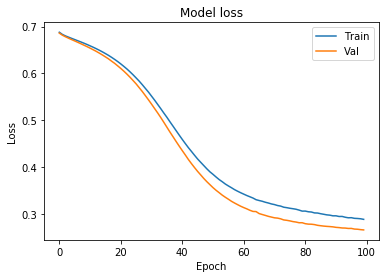

In [24]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper right")
plt.show()

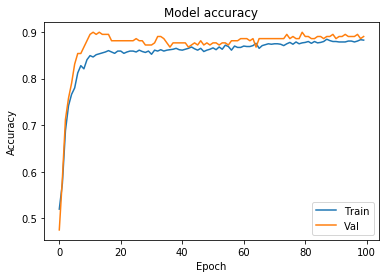

In [27]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="lower right")
plt.show()

In [28]:
model_2 = Sequential([
    Dense(1000, activation="relu", input_shape=(10,)),
    Dense(1000, activation="relu"),
    Dense(1000, activation="relu"),
    Dense(1000, activation="relu"),
    Dense(1, activation="sigmoid"),
])

model_2.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

hist_2 = model_2.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_val, Y_val),
)

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 3s 2ms/step - loss: 0.5531 - accuracy: 0.7133 - val_loss: 0.3354 - val_accuracy: 0.8767
Epoch 2/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.3884 - accuracy: 0.8337 - val_loss: 0.2990 - val_accuracy: 0.8813
Epoch 3/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.3542 - accuracy: 0.8581 - val_loss: 0.3393 - val_accuracy: 0.8721
Epoch 4/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.3076 - accuracy: 0.8611 - val_loss: 0.3248 - val_accuracy: 0.8630
Epoch 5/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.3224 - accuracy: 0.8513 - val_loss: 0.2791 - val_accuracy: 0.8858
Epoch 6/100
1022/1022 [==============================] - 2s 1ms/step - loss: 0.2893 - accuracy: 0.8630 - val_loss: 0.3026 - val_accuracy: 0.8950
Epoch 7/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2636

Epoch 57/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1527 - accuracy: 0.9266 - val_loss: 0.3989 - val_accuracy: 0.8858
Epoch 58/100
1022/1022 [==============================] - 2s 1ms/step - loss: 0.1514 - accuracy: 0.9354 - val_loss: 0.3733 - val_accuracy: 0.8858
Epoch 59/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1595 - accuracy: 0.9276 - val_loss: 0.3277 - val_accuracy: 0.8995
Epoch 60/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1912 - accuracy: 0.9198 - val_loss: 0.3102 - val_accuracy: 0.8813
Epoch 61/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1772 - accuracy: 0.9286 - val_loss: 0.2866 - val_accuracy: 0.8858
Epoch 62/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1709 - accuracy: 0.9149 - val_loss: 0.3030 - val_accuracy: 0.9041
Epoch 63/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1580 - accuracy: 0.9247 - val_loss: 0.3206 -

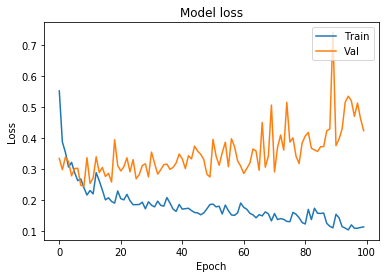

In [29]:
plt.plot(hist_2.history["loss"])
plt.plot(hist_2.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper right")
plt.show()

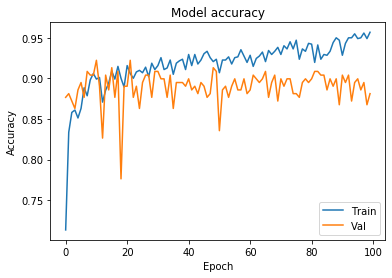

In [30]:
plt.plot(hist_2.history["accuracy"])
plt.plot(hist_2.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="lower right")
plt.show()

In [31]:
from keras.layers import Dropout
from keras import regularizers

In [32]:
model_3 = Sequential([
    Dense(1000, activation="relu", kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation="sigmoid", kernel_regularizer=regularizers.l2(0.01)),
])

In [33]:
model_3.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

hist_3 = model_3.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_val, Y_val),
)

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 4s 4ms/step - loss: 14.3429 - accuracy: 0.6703 - val_loss: 3.9504 - val_accuracy: 0.6027
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 1.7115 - accuracy: 0.8082 - val_loss: 0.7103 - val_accuracy: 0.8493
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.6227 - accuracy: 0.8307 - val_loss: 0.5070 - val_accuracy: 0.8676
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5270 - accuracy: 0.8630 - val_loss: 0.4597 - val_accuracy: 0.8813
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5138 - accuracy: 0.8591 - val_loss: 0.4523 - val_accuracy: 0.8995
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5133 - accuracy: 0.8474 - val_loss: 0.4554 - val_accuracy: 0.8858
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.476

Epoch 57/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4473 - accuracy: 0.8689 - val_loss: 0.4301 - val_accuracy: 0.8904
Epoch 58/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4407 - accuracy: 0.8826 - val_loss: 0.4167 - val_accuracy: 0.8950
Epoch 59/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4506 - accuracy: 0.8767 - val_loss: 0.4140 - val_accuracy: 0.9178
Epoch 60/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4471 - accuracy: 0.8806 - val_loss: 0.4158 - val_accuracy: 0.8950
Epoch 61/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4534 - accuracy: 0.8767 - val_loss: 0.4074 - val_accuracy: 0.9041
Epoch 62/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4435 - accuracy: 0.8738 - val_loss: 0.4171 - val_accuracy: 0.9132
Epoch 63/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4740 - accuracy: 0.8591 - val_loss: 0.4177 -

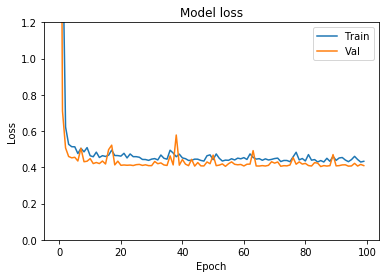

In [34]:
plt.plot(hist_3.history["loss"])
plt.plot(hist_3.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper right")
plt.ylim(top=1.2, bottom=0)
plt.show()

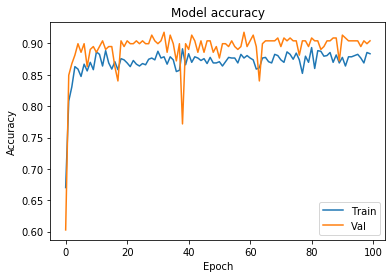

In [35]:
plt.plot(hist_3.history["accuracy"])
plt.plot(hist_3.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="lower right")
plt.show()